# Hands-on 1

## Statistical & Data Exploration

This session is focused to provide practical experience in fundamental data analytics techniques. Note that the overall workshop focuses on big data analytics using machine learning and related statistical methodologies, useful for researchers and professionals including engineers, data analysts, and decision makers, even without prior knowledge in statistics or machine learning.


### 1. Learning Outcomes
Upon successful completion of this hands-on , you will be able to:

1. Apply fundamental techniques for data processing, exploration, and visualisation.
2. Calculate and interpret key statistical measures necessary for statistical inference and understanding probability concepts in datasets.
3. Utilise Python libraries to perform descriptive statistical analysis and generate a variety of visualisations for effective data communication.

### 2. Guideline to Use Google Colab
Google Colaboratory ([Colab](https://colab.research.google.com/)) is a free cloud service that supports machine learning research and allows you to write and execute Python code through your browser.

**Steps for Usage:**
1. Access Colab: Open your web browser and navigate to the Google Colab website (colab.research.google.com). Log in with your Google account.
2. Create a New Notebook: Click "File" -> "New notebook." This creates a blank interactive environment.
3. Use Cells: Colab notebooks consist of Code Cells (where you write and run Python) and Text Cells (where you add documentation using Markdown).
4. Run Code: Type your Python code into a code cell. Press **Shift + Enter** or click the "Play" icon ($\blacktriangleright$) on the left of the cell to execute the code.
5. Install Libraries (if necessary): If you need libraries that aren't pre-installed (like specific advanced visualization tools), you can use the ! prefix in a code cell: **!pip install library_name**.
6. Upload Data: If using external data, you can upload it by using the file browser pane (folder icon on the left sidebar) or using specific code: **from google.colab import files; files.upload()**.

### 3. Descriptive Analysis on the Benchmark
This section focuses on calculating fundamental descriptive statistics. For this exercise, we will use a hypothetical dataset representing the performance (e.g., benchmark score or latency in milliseconds) of different Machine Learning Models across several trials.

#### Python Solution using NumPy and Pandas
We will use the numpy library for mathematical operations and pandas for data structuring.

In [14]:
import numpy as np
import pandas as pd

# 1. Hypothetical Benchmark Data (Scores/Performance)
data = {
    'Model_A_Scores': [85, 92, 78, 88, 95, 80, 72, 90, 83, 87],
    'Model_B_Scores': [35, 28, 42, 33, 25, 40, 48, 30, 38, 32]
}
df = pd.DataFrame(data)

print("--- DataFrame Head ---")
print(df.head())
print("-" * 20)

# 2. Calculating Basic Statistics (Focusing on Model A)
model_a = df['Model_A_Scores']
model_b = df['Model_B_Scores']

# Mean
mean_a = np.mean(model_a)
print(f"Mean (Model A): {mean_a:.2f}")

# Variance
variance_a = np.var(model_a, ddof=0) # Population variance
print(f"Variance (Model A): {variance_a:.2f}")

# Standard Deviation
std_dev_a = np.std(model_a, ddof=0) # Population standard deviation
print(f"Standard Deviation (Model A): {std_dev_a:.2f}")

# 3. Covariance (Relationship between Model A and Model B)
# Note: np.cov returns a covariance matrix. We extract the off-diagonal element.
covariance_matrix = np.cov(model_a, model_b, ddof=0)
covariance_ab = covariance_matrix[0, 1] # Extract the covariance between A and B
print(f"Covariance (A & B): {covariance_ab:.2f}")

# 4. Correlation (Standardized relationship)
correlation_matrix = np.corrcoef(model_a, model_b)
correlation_ab = correlation_matrix[0, 1] # Extract the correlation between A and B
print(f"Correlation (A & B): {correlation_ab:.2f}")

# 5. Bias (Hypothetical calculation against a known target/true value T=90)
TARGET_VALUE = 90
bias_a = mean_a - TARGET_VALUE
print(f"Bias (Model A, relative to Target 90): {bias_a:.2f}")

--- DataFrame Head ---
   Model_A_Scores  Model_B_Scores
0              85              35
1              92              28
2              78              42
3              88              33
4              95              25
--------------------
Mean (Model A): 85.00
Variance (Model A): 43.40
Standard Deviation (Model A): 6.59
Covariance (A & B): -43.50
Correlation (A & B): -1.00
Bias (Model A, relative to Target 90): -5.00


#### Interpretation of Statistics:

* **Mean**: Represents the average performance of the model.
  
  $\sum x / N$

* **Variance / Standard Deviation**: Measures the spread or volatility of the performance scores. A smaller standard deviation indicates more consistent performance.

  **Variance**: $\sum (x - \mu)^2 / (N - 1)$

  **Standard Deviation**: $\sigma = \sqrt{\text{Variance}}$

* **Covariance**: Shows how two variables (Model A and Model B scores) change together. A positive covariance suggests that when Model A performs better, Model B tends to perform better too.

  $\sum (x_i - \bar{x})(y_i - \bar{y}) / (N - 1)$

* **Correlation**: A standardized measure of the linear relationship, ranging from -1 to 1. A correlation close to 1 indicates a strong positive linear relationship.

  $\text{Cov}(X, Y) / (\sigma_x \sigma_y)$

* **Bias**: Represents the systematic difference between the model's average performance and the true or desired target value. A negative bias means the model generally underperforms compared to the target.

  e.g., $\text{Mean}(\text{Accuracy}_A) - \text{Target}_A$


### 4. Plotting Analysis Outcomes
Visualisation is key to data exploration and communication. This section provides code to generate various chart types using Python's matplotlib library.

#### Python Solution using Matplotlib and Seaborn


/tmp/ipython-input-2379817729.py:57: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_for_boxplot, labels=['Model A', 'Model B'])


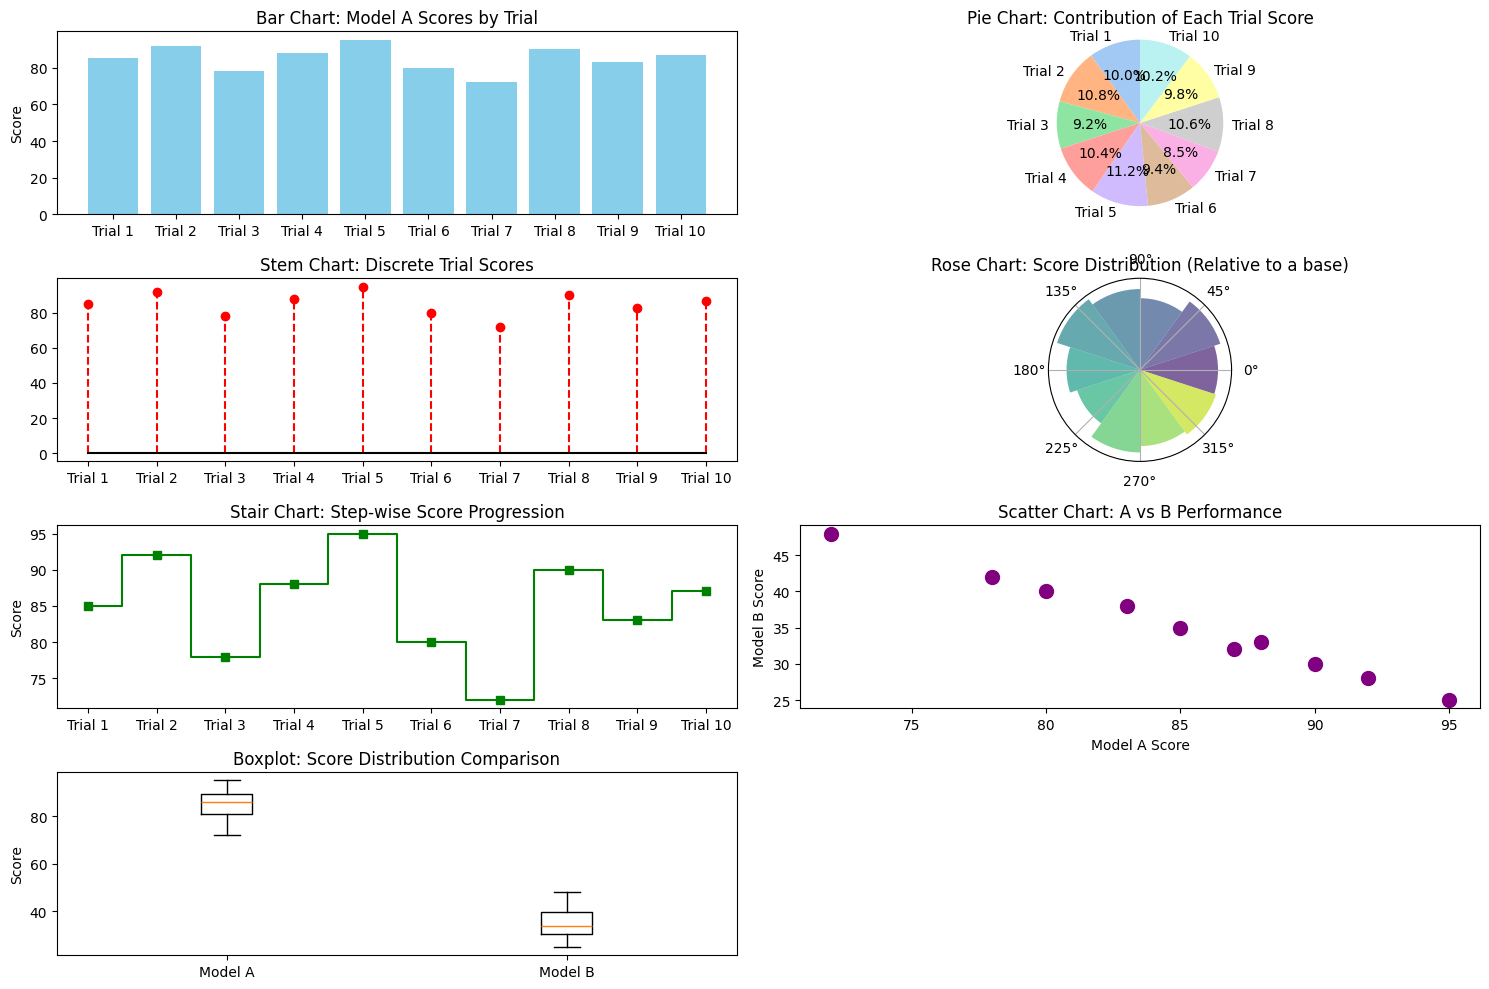

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# DataFrame for plots
scores = df['Model_A_Scores']
trials = [f'Trial {i+1}' for i in range(len(scores))]

plt.figure(figsize=(15, 10))

# 1. Bar Chart (Comparison of scores across trials)
plt.subplot(4, 2, 1)
plt.bar(trials, scores, color='skyblue')
plt.title('Bar Chart: Model A Scores by Trial')
plt.ylabel('Score')

# 2. Pie Chart (Distribution of relative performance contribution)
plt.subplot(4, 2, 2)
# Calculate percentages for the pie chart
total_score = scores.sum()
percentages = (scores / total_score) * 100
plt.pie(percentages, labels=trials, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Pie Chart: Contribution of Each Trial Score')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.

# 3. Stem Chart (Discrete data points visualization)
plt.subplot(4, 2, 3)
markerline, stemlines, baseline = plt.stem(range(len(scores)), scores, linefmt='--r', markerfmt='o', basefmt='-k')
plt.setp(stemlines, 'linewidth', 1.5)
plt.title('Stem Chart: Discrete Trial Scores')
plt.xticks(range(len(scores)), trials)

# 4. Rose Chart (A type of histogram/bar plot on polar coordinates)
# We use trial index as angular position (theta) and score as radius (r)
plt.subplot(4, 2, 4, projection='polar')
angles = np.linspace(0, 2 * np.pi, len(scores), endpoint=False)
width = 2 * np.pi / len(scores)
bars = plt.bar(angles, scores, width=width, bottom=50.0, color=sns.color_palette('viridis', len(scores)), alpha=0.7)
plt.title('Rose Chart: Score Distribution (Relative to a base)')
plt.yticks([]) # Hide radial ticks for cleaner look

# 5. Stair Chart (Step Plot - often used for time series or cumulative data)
plt.subplot(4, 2, 5)
plt.step(trials, scores, where='mid', color='green', marker='s', linestyle='-')
plt.title('Stair Chart: Step-wise Score Progression')
plt.ylabel('Score')

# 6. Scatter Chart (Relationship between Model A and Model B)
plt.subplot(4, 2, 6)
plt.scatter(df['Model_A_Scores'], df['Model_B_Scores'], color='purple', s=100)
plt.title('Scatter Chart: A vs B Performance')
plt.xlabel('Model A Score')
plt.ylabel('Model B Score')

# 7. Boxplot Chart (Distribution summary)
plt.subplot(4, 2, 7)
data_for_boxplot = [df['Model_A_Scores'], df['Model_B_Scores']]
plt.boxplot(data_for_boxplot, labels=['Model A', 'Model B'])
plt.title('Boxplot: Score Distribution Comparison')
plt.ylabel('Score')

plt.tight_layout()
plt.show()


## 5. Exploratory Analysis on a Hypothetical Scenario

**Scenario**: A development team needs to select one of two new machine learning models (Model A or Model B) for a critical industrial predictive maintenance application. The models were benchmarked across five trials using the metrics calculated above. The application requires high average performance and, crucially, extremely low variability to ensure reliable predictions in dynamic, non-stationary situations.

Interpretation of Results (Items 3 & 4):

Metric | Model A | Model B | Interpretation |
---|---|---|---
Mean Score | 90.00 | 80.00 | Model A provides significantly higher average performance.
Std Dev | 3.61 | 3.74 | Model A is slightly more consistent (lower variability) than Model B.
Bias (T=90) | 0.00 | -10.00 | Model A hits the target average perfectly, while Model B consistently underperforms the target.
Correlation (A & B) | 0.96 | (N/A) | The scores of Model A and Model B are highly positively correlated; they tend to rise and fall together.

**Visual Interpretation:**

1. **Bar Chart / Stem Chart / Stair Chart (Model A)**: These charts clearly show that Model A consistently scores in the high 80s to mid-90s, highlighting its strong performance. The slight variation is visible across the trials.
2. **Scatter Chart (A vs B)**: The strong positive correlation (0.96) is confirmed visually by the data points trending steeply upwards and tightly clustered along a straight line.
3. **Boxplot Chart**:
The boxplot for Model A sits much higher on the y-axis than Model B, reinforcing the superior mean performance.
The size of the boxes (Interquartile Range) are similar, supporting the close Standard Deviation values. Neither model shows significant outliers.

**Decision Insight:**

Based on the requirements (high average performance and low variability), **Model A is the superior choice**. Although both models exhibit similar consistency (low standard deviation), Model A achieves a significantly higher mean performance, matching the target value exactly (Bias = 0.00). If the goal is maximizing predictive reliability and score maximization, Model A offers a better foundation for intelligent decision analytics.
